In [53]:
ls /home/spetz/SPICY\ sources/G*/*fits

/home/spetz/SPICY sources/G12/SPICYTableG12.fits
/home/spetz/SPICY sources/G333/SPICYTableG333.fits
/home/spetz/SPICY sources/G351/SPICYTableG351.fits


In [54]:
cp /home/spetz/SPICY\ sources/G351/SPICYTableG351.fits /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G351.fits

In [55]:
cp /home/spetz/SPICY\ sources/G333/SPICYTableG333.fits /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G333.fits

In [56]:
cp /home/spetz/SPICY\ sources/G12/SPICYTableG12.fits /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G012.fits

In [57]:
cp /blue/adamginsburg/morganhimes/SourceTableBuilding/Notebooks/SPICYTable_G008.fits  /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits

cp: cannot create regular file ‘/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits’: Permission denied


In [58]:
ls -lh /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables

total 448K
-rw-r--r--+ 1 morganhimes  adamginsburg  79K Apr  5 03:54 tbl_G008.fits
-rw-rwxr--+ 1 adamginsburg adamginsburg 197K Apr  5 16:46 tbl_G012.fits*
-rw-rw-r--+ 1 btingle      adamginsburg  85K Mar 31 16:49 tbl_G328
-rw-rw-r--+ 1 btingle      adamginsburg  85K Mar 22 16:38 tbl_G328.fits
-rw-rwxr--+ 1 adamginsburg adamginsburg 197K Apr  5 16:46 tbl_G333.fits*
-rw-rw-r--+ 1 adamginsburg adamginsburg 197K Apr  5 16:46 tbl_G351.fits


In [59]:
%%bash
setfacl -R -m d:u:morganhimes:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m u:morganhimes:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m u:btingle:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m d:u:btingle:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m u:spetz:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables
setfacl -R -m d:u:spetz:rwX /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables

setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G328: Operation not permitted
setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G328.fits: Operation not permitted
setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G008.fits: Operation not permitted
setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G328: Operation not permitted
setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G328.fits: Operation not permitted
setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G008.fits: Operation not permitted
setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G328: Operation not permitted
setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G328.fits: Operation not permitted
setfacl: /blue/adamginsburg/adamginsburg/SPICY_ALMAIMF/tables/tbl_G008.fits: Operation not permitted


In [60]:
g328fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G328.fits'
g008fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits'
g351fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G351.fits'
g012fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G012.fits'
g333fn = '/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G333.fits'

In [61]:
ls -lhrt $g328fn

-rw-rw-r--+ 1 btingle adamginsburg 85K Mar 22 16:38 /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G328.fits


In [62]:
ls -lhrt $g008fn

-rw-r--r--+ 1 morganhimes adamginsburg 79K Apr  5 03:54 /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G008.fits


In [63]:
ls -lh $g351fn

-rw-rw-r--+ 1 adamginsburg adamginsburg 197K Apr  5 16:46 /blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/tables/tbl_G351.fits


In [64]:
from astropy.table import Table, vstack

In [65]:
g008tb = Table.read(g008fn)
len(g008tb)

13

In [66]:
g008tb['Luminosity Median', 'LOS mass Median']

Luminosity Median,LOS mass Median
float64,float64
2.4355659269151393,-1.0843212908102347
2.585646937969941,-0.28943289716324627
1.6736763437687703,-0.2774978452722406
2.5703837214870386,0.12525864858286667
2.3120088982061273,-1.1528129155157605
3.481778050866666,-0.44445408096464634
5.220798308456374,-0.3343741460964237
2.2191380561604026,-1.3715946891945787
2.179230241466306,0.6620143494668901


In [67]:
g328tb = Table.read(g328fn)
len(g328tb)

17

In [68]:
g351tb = Table.read(g351fn)
len(g351tb)

118

In [69]:
g333tb = Table.read(g333fn)
len(g333tb)

118

In [71]:
g012tb = Table.read(g012fn)
len(g012tb)

118

In [72]:
tb = vstack([g008tb, g328tb, g351tb, g333tb, g012tb])

In [73]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor']='w'

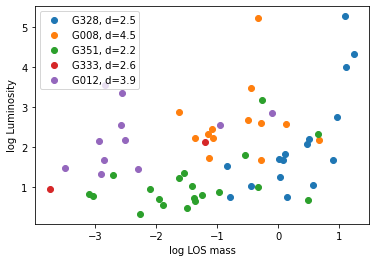

In [77]:
pl.plot(g328tb['LOS mass Median'], g328tb['Luminosity Median'], 'o', label='G328, d=2.5')
pl.plot(g008tb['LOS mass Median'], g008tb['Luminosity Median'], 'o', label='G008, d=4.5')
pl.plot(g351tb['LOS mass Median'], g351tb['Luminosity Median'], 'o', label='G351, d=2.2')
pl.plot(g333tb['LOS mass Median'], g333tb['Luminosity Median'], 'o', label='G333, d=2.6')
pl.plot(g012tb['LOS mass Median'], g012tb['Luminosity Median'], 'o', label='G012, d=3.9')
pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best')

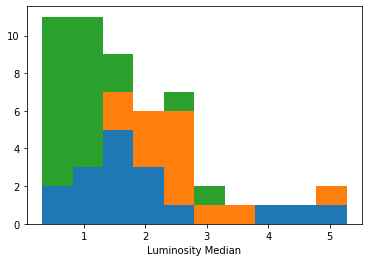

In [76]:
pl.hist([g328tb['Luminosity Median'],
g008tb['Luminosity Median'],
g351tb['Luminosity Median'],], histtype='barstacked')
pl.xlabel("Luminosity Median");

In [17]:
g328tb['ALMA-IMF_1mm_flux', 'ALMA-IMF_1mm_eflux',]

ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux
Jy / beam,Jy / beam
float64,float64
--,0.38574923894221214
--,0.38574923894221214
--,0.38574923894221214
--,--
--,--
1.3557265677295753,--
--,0.38574923894221214
82.70039656216524,0.38574923894221214


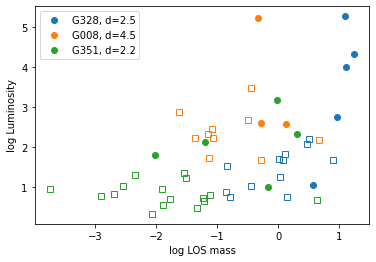

In [18]:
Lg328, = pl.plot(g328tb['LOS mass Median'][~g328tb['ALMA-IMF_1mm_flux'].mask], g328tb['Luminosity Median'][~g328tb['ALMA-IMF_1mm_flux'].mask], 'o', label='G328, d=2.5')
Lg008, = pl.plot(g008tb['LOS mass Median'][~g008tb['ALMA-IMF_1mm_flux'].mask], g008tb['Luminosity Median'][~g008tb['ALMA-IMF_1mm_flux'].mask], 'o', label='G008, d=4.5')
Lg351, = pl.plot(g351tb['LOS mass Median'][~g351tb['ALMA-IMF_1mm_flux'].mask], g351tb['Luminosity Median'][~g351tb['ALMA-IMF_1mm_flux'].mask], 'o', label='G351, d=2.2')
pl.plot(g328tb['LOS mass Median'][g328tb['ALMA-IMF_1mm_flux'].mask], g328tb['Luminosity Median'][g328tb['ALMA-IMF_1mm_flux'].mask], 's', markerfacecolor='none', color=Lg328.get_color())
pl.plot(g008tb['LOS mass Median'][g008tb['ALMA-IMF_1mm_flux'].mask], g008tb['Luminosity Median'][g008tb['ALMA-IMF_1mm_flux'].mask], 's', markerfacecolor='none', color=Lg008.get_color())
pl.plot(g351tb['LOS mass Median'][g351tb['ALMA-IMF_1mm_flux'].mask], g351tb['Luminosity Median'][g351tb['ALMA-IMF_1mm_flux'].mask], 's', markerfacecolor='none', color=Lg351.get_color())

pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best')

In [19]:
g328tb['Luminosity Median', 'LOS mass Median']

Luminosity Median,LOS mass Median
float64,float64
1.687230420005407,0.012554904129778027
1.5183951298045943,--
1.0108152154722867,-0.4470735216522169
2.184433739182887,0.5040565852889713
1.678222681227759,0.8954165552891606
1.0477507575912837,0.5691429405806151
1.5173303957001467,-0.8447692605191803
3.9939283913935153,1.1016593628664675
4.325800410500175,1.2434300964079688


In [20]:
g008tb['Luminosity Median', 'LOS mass Median']

Luminosity Median,LOS mass Median
float64,float64
2.4355659269151393,-1.0843212908102347
2.585646937969941,-0.28943289716324627
1.6736763437687703,-0.2774978452722406
2.5703837214870386,0.12525864858286667
2.3120088982061273,-1.1528129155157605
3.481778050866666,-0.44445408096464634
5.220798308456374,-0.3343741460964237
2.2191380561604026,-1.3715946891945787
2.179230241466306,0.6620143494668901


In [21]:
g351tb['Luminosity Median', 'LOS mass Median'][~g351tb['Luminosity Median'].mask]

Luminosity Median,LOS mass Median
float64,float64
1.298272320191103,-2.3592501928172624
1.012821606474041,-2.548925863293799
2.1283587713539274,-1.1997677949917245
0.8791695691860197,-0.8661719374552129
0.4572777556350963,-1.334308559869538
0.9320426957915608,-1.9072313728279857
0.8183163022803694,-2.701016269484034
0.7996119018530254,-1.1178437452159673
0.7274670512569907,-1.2318033800124315


/orange/adamginsburg/miniconda3/envs/python38/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


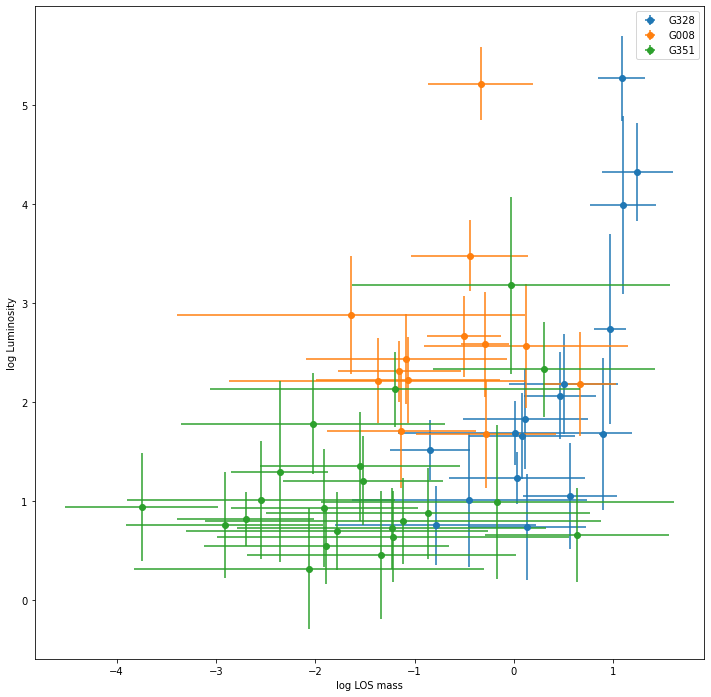

In [22]:
pl.figure(figsize=(12,12))
pl.errorbar(g328tb['LOS mass Median'], g328tb['Luminosity Median'], xerr=g328tb['LOS mass MAD'], yerr=g328tb['Luminosity MAD'], marker='o', linestyle='none', label='G328')
pl.errorbar(g008tb['LOS mass Median'], g008tb['Luminosity Median'], xerr=g008tb['LOS mass MAD'], yerr=g008tb['Luminosity MAD'], marker='o', linestyle='none', label='G008')
pl.errorbar(g351tb['LOS mass Median'], g351tb['Luminosity Median'], xerr=g351tb['LOS mass MAD'], yerr=g351tb['Luminosity MAD'], marker='o', linestyle='none', label='G351')

pl.xlabel("log LOS mass")
pl.ylabel("log Luminosity")
pl.legend(loc='best')